In [28]:
#Importamos las librerias que ocuparemos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [29]:
#Cargamos el datasef
df = pd.read_csv(r"C:\Users\Elias\Documents\Segundo Proyecto Individual\Datasets\homicidios.xlsx - HECHOS.csv")
#Hacemos una copia del dataset y lo convertimos en dataframe
clean_hechos = pd.DataFrame(df.copy())
#Mostramos el dataframe
clean_hechos.head()


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,1/10/2016,2016,1,10,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,1/21/2016,2016,1,21,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


Descripcion del dataframe 


In [30]:
#Describimos el dataframe mediante un ciclo for 
for col in df.columns: 
    print(f'La columna "{col}" es de tipo {clean_hechos[col].dtype}')

La columna "ID" es de tipo object
La columna "N_VICTIMAS" es de tipo int64
La columna "FECHA" es de tipo object
La columna "AAAA" es de tipo int64
La columna "MM" es de tipo int64
La columna "DD" es de tipo int64
La columna "HORA" es de tipo object
La columna "HH" es de tipo object
La columna "LUGAR_DEL_HECHO" es de tipo object
La columna "TIPO_DE_CALLE" es de tipo object
La columna "Calle" es de tipo object
La columna "Altura" es de tipo float64
La columna "Cruce" es de tipo object
La columna "Dirección Normalizada" es de tipo object
La columna "COMUNA" es de tipo int64
La columna "XY (CABA)" es de tipo object
La columna "pos x" es de tipo object
La columna "pos y" es de tipo object
La columna "PARTICIPANTES" es de tipo object
La columna "VICTIMA" es de tipo object
La columna "ACUSADO" es de tipo object


En este bloque de codigo se explica como esta estructurado el dataframe y que tipo de dato son sus columnas.

Nulos del dataframe


In [31]:
#Cuantificamos los valores nulos del dataframe 
clean_hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

En este bloque de codigo se muestra la cantidad de valores nulos que hay en cada columna del dataframe, a partir de saber esto, podemos ver que columnas estan completas y saber cuales no. Podemos empezar a tener una idea de cuales columnas son canditadas a quitarlas del dataframe dado su redundancia.


Analísis Visual del dataframe

In [32]:
#Vizualisamos el dataframe 
clean_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,1/10/2016,2016,1,10,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,1/21/2016,2016,1,21,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


Al visualisar el dataframe podemos ver un panorama general de los datos, sabiendo de antemano que las columnas cruce y altura presentan una gran cantidad de vacios, se decide quitar la columna altura, por la cantidad de vacios,la columna cruce a pesar de tener valores faltantes se deja dado que es una columna que nos da un entendimiento del tipo de lugar donde ocurren los accidentes. Analisando el dataframe , podemos ver que hay columnas que parten de una columna principal, haciendo redundante el dataframe, esas columnas principales seran eliminadas.

Eliminando columnas del dataframe


In [33]:
#Hacemos una lista con las columnas a eliminar
lista_columnas = ["FECHA","HORA","LUGAR_DEL_HECHO","Altura","XY (CABA)","PARTICIPANTES"]

#Eliminamos del dataframe las columnas que se almacenan en la lista(lista_columnas)
clean_hechos.drop(lista_columnas, axis=1, inplace=True)

Eliminamos del dataset las columnas principales, dado que su información se coloco en columnas apartes , siendo mas legible su comprension, eliminando la necesidad de tener las columnas principales en el dataset y dando un entendimiento mas claro del dataset. 

Visualización actualizada del dataframe

In [34]:
#Mostramos el dataframe actualizado
clean_hechos.head()

,ID,N_VICTIMAS,AAAA,MM,DD,HH,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016,1,1,4,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47533969,-34.68757022,MOTO,AUTO
1,2016-0002,1,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.50877521,-34.66977709,AUTO,PASAJEROS
2,2016-0003,1,2016,1,3,7,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,-58.39040293,-34.63189362,MOTO,AUTO
3,2016-0004,1,2016,1,10,0,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.46503904,-34.68092974,MOTO,SD
4,2016-0005,1,2016,1,21,5,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.38718297,-34.62246630,MOTO,PASAJEROS


Esta es la versión actualizada del dataframe, sin columnas redundantes ni vacias. Dejando las columnas necesarias para el analisís profundo

Limpieza de valores nulos


In [35]:
#vizualisamos las pocisiones donde se encuentran los valores nulos de la columna ["Dirección Normalizada"]
clean_hechos[clean_hechos["Dirección Normalizada"].isnull()]

,ID,N_VICTIMAS,AAAA,MM,DD,HH,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,pos x,pos y,VICTIMA,ACUSADO
38,2016-0052,1,2016,4,20,20,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,NaN,13,.,.,MOTO,SD
106,2016-0136,1,2016,10,25,0,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,NaN,4,.,.,MOTO,CARGAS
119,2016-0151,1,2016,11,18,20,CALLE,NaN,NaN,NaN,0,.,.,PEATON,SD
180,2017-0050,2,2017,4,28,11,AUTOPISTA,AUTOPISTA PERITO MORENO,NaN,NaN,9,.,.,MOTO,CARGAS
181,2017-0051,1,2017,5,1,3,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NaN,NaN,7,.,.,AUTO,AUTO
313,2018-0039,1,2018,4,21,22,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,NaN,14,.,.,PEATON,AUTO
546,2020-0026,1,2020,5,17,6,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,NaN,14,.,.,MOTO,OBJETO FIJO
621,2021-0023,1,2021,3,1,9,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,NaN,4,.,.,MOTO,CARGAS


In [36]:
#Vizualisamos los valores nulos de la columna ["Calle"]
clean_hechos[clean_hechos["Calle"].isnull()]

,ID,N_VICTIMAS,AAAA,MM,DD,HH,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,pos x,pos y,VICTIMA,ACUSADO
119,2016-0151,1,2016,11,18,20,CALLE,NaN,NaN,NaN,0,.,.,PEATON,SD


In [37]:
#Eliminamos los valores nulos de la columna ["Calle"]
clean_hechos.dropna(subset=["Calle"],inplace=True)

In [38]:
#Hacemos una suma de los valores nulos del dataframe actualizados
clean_hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
AAAA                       0
MM                         0
DD                         0
HH                         0
TIPO_DE_CALLE              0
Calle                      0
Cruce                    170
Dirección Normalizada      7
COMUNA                     0
pos x                      0
pos y                      0
VICTIMA                    0
ACUSADO                    0
dtype: int64

Finalizamos el limpiado de datos, buscando valores nulos del dataframe que afecten la calidad de los datos, encontramos que los pocos datos nulos de la columna ["Dirección Normalizada"] no afectaban a las demas filas y decidi dejarlas en vez de eliminar esas filas.
Buscamos el valor nulo que estaba en la columna ["Calle"] , el valor nulo que encontramos no contenia informacion , asi que, se procedio a eliminarlo.
Por ultimo, pero menos importante, hacemos un conteo de valores nulos del dataframe, entendemos que la columna cruze es necesaria para poder hacerle un analísis posterior.

In [39]:
#Creamos un archivo parquet con el dataset limpio
clean_hechos.to_parquet(r"C:\Users\Elias\Documents\Segundo Proyecto Individual\EDA\EDA_hechos.parquet")

Analísis Exploratorio de Datos(EDA)

Accidentes conforme el tiempo(Histórico)

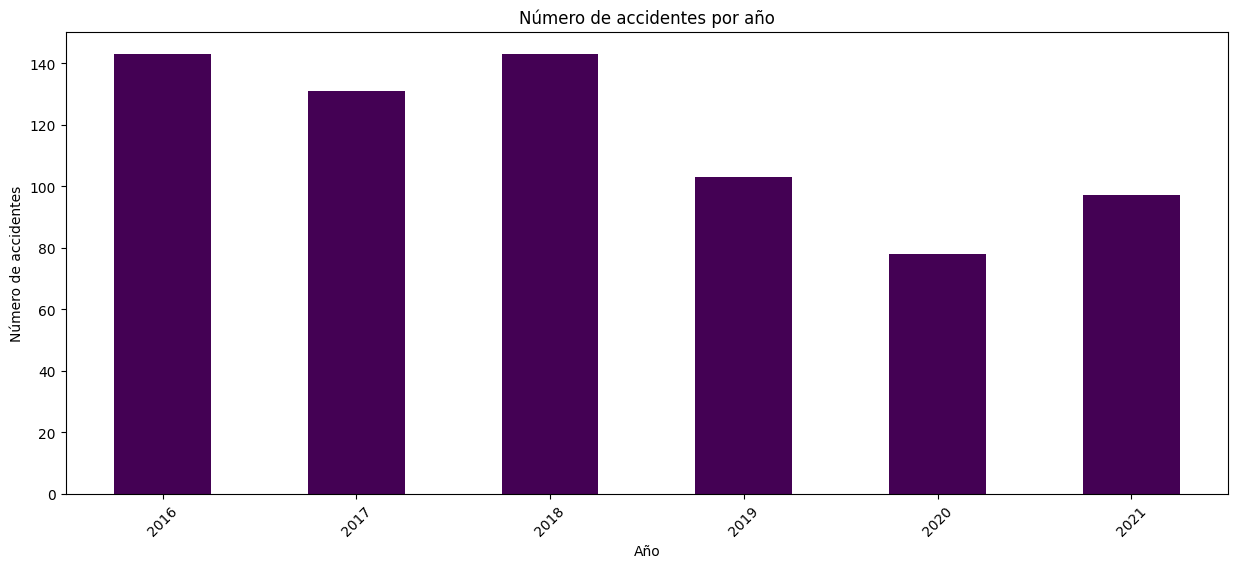

In [40]:
#Agrupamos por años los datos para contar los accidentes 
accidentes_por_anio = clean_hechos.groupby('AAAA').size()

#Generamos un gráfico de barras para visualizar el número de accidentes por año
accidentes_por_anio.plot(kind='bar', figsize=(15, 6), title='Número de accidentes por año',colormap= "viridis")
plt.xticks(rotation=45)
plt.xlabel('Año')
plt.ylabel('Número de accidentes')
plt.show()

In [41]:
#Creamos un ciclo for para iterar en accidentes_por_anio y nos imprima el numero de accidentes por año
for anio, numero_accidentes in accidentes_por_anio.items(): #se declara un ciclo for con los parametros de als columnas a imprimir ("anio" , "numero_accidentes)
    print(f'El año {anio} tuvo {numero_accidentes} accidentes.') #se imprime la respuesta

El año 2016 tuvo 143 accidentes.
El año 2017 tuvo 131 accidentes.
El año 2018 tuvo 143 accidentes.
El año 2019 tuvo 103 accidentes.
El año 2020 tuvo 78 accidentes.
El año 2021 tuvo 97 accidentes.


En este analísis busco tener una idea general de cuantos accidentes han ocurrido a lo largo de los años, al aplicar el codigo para analizar los datos, vemos que este analisis nos dice que de los años 2016-2019 los accidentes superaban el centenar de casos , vemos tambien una disminución notable en el año 2020 , la causa fue que es el inicio de la pandemia y la cuarentena que paro todo tipo de movilidad vehicular. 
Observamos que despues de este suceso "pandemico", el año 2021 mostro una subida considerable de siniestros en comparacion al 2020.
Puedo concluir que, teniendo en cuenta que en el año 2021 se comentaba que el fin de la pandemia estaba cerca, la gente empezaba a descuidar la cuarentena, empezaba a tomarse mas libertades, la gente empezaba a salir de casa, haciendo que el flujo vehicular aumentara,provocando la subida en los siniestros viales. Teniendo en cuenta que el fin de la pandemia esta cerca se puede esperar un incremento considerable en los siniestros viables del año 2022, en consecuencia que la población regrese a su vida normal y necesitara un medio de transporte para hacerla (carro, motos,buses,etc).
Mi recomendación es concientizar a la poblacion por medio de campañas en redes sociales o televisión, de mantener la calma y el cuidado a la hora de manejar o andar en vias publicas respentando y acatando las instrucciones viales.

Accidentes conforme el mes(Histórico)

In [42]:
#Agrupamos la columna mes por numero de mes
accidentes_por_mes = clean_hechos.groupby('MM').size() #Agrupamos los meses conforme el numero de mes
accidentes_por_mes.head()#Mostramos el dataframe creado

MM
1    62
2    56
3    51
4    50
5    60
dtype: int64

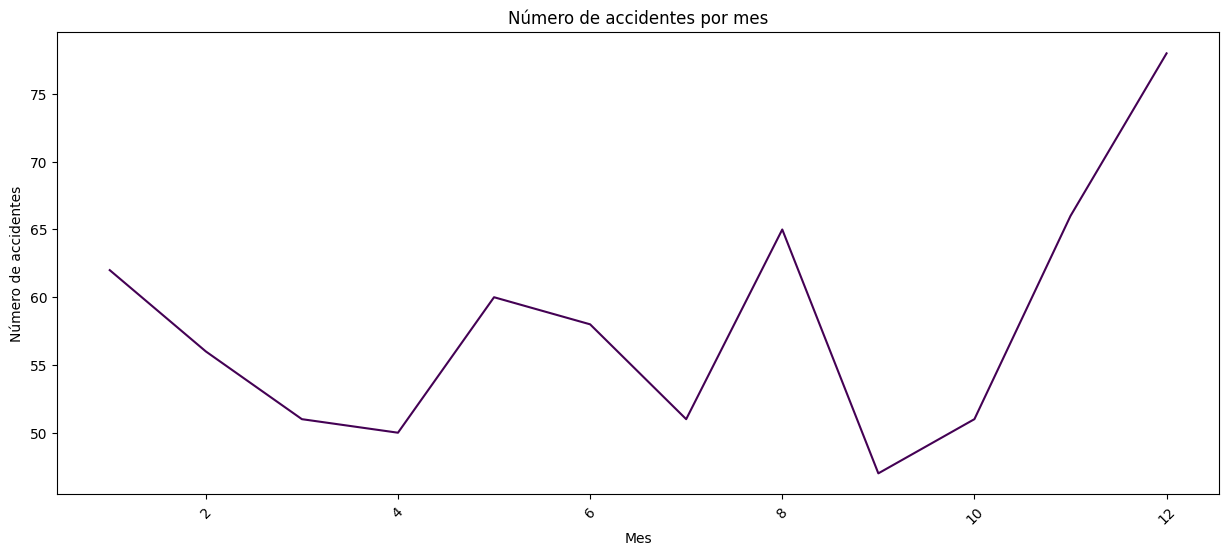

In [43]:
#Graficamos accidentes_por mes 
accidentes_por_mes.plot(kind='line', figsize=(15, 6), title='Número de accidentes por mes', colormap= "viridis")
plt.xticks(rotation=45) # Rotamos los valores
plt.xlabel('Mes') # Número de mes
plt.ylabel('Número de accidentes') # Cantidad de accidentes
plt.show() #Mostramos la grafica


In [44]:
#Creamos un ciclo for que nos imprima el resultado de esta grafica

for mes, numero_accidentes in accidentes_por_mes.items(): #se declara un ciclo for con los parametros de los meses y los numero de accidentes
    print(f'El mes {mes} tuvo {numero_accidentes} accidentes.') #se imprime la respuesta


El mes 1 tuvo 62 accidentes.
El mes 2 tuvo 56 accidentes.
El mes 3 tuvo 51 accidentes.
El mes 4 tuvo 50 accidentes.
El mes 5 tuvo 60 accidentes.
El mes 6 tuvo 58 accidentes.
El mes 7 tuvo 51 accidentes.
El mes 8 tuvo 65 accidentes.
El mes 9 tuvo 47 accidentes.
El mes 10 tuvo 51 accidentes.
El mes 11 tuvo 66 accidentes.
El mes 12 tuvo 78 accidentes.


En esta grafica podemos observar el comportamiento que tienen los siniestros viales en meses a lo largo de los años registrados, podemos observar como en los 1eros meses de los años los siniestros viales disminuyen, mientras que vemos que el numero de siniestros viales aumenta conforme llega a mediados de año, observamos que pasando el medio año los siniestros viales disminuyen para si volver a aumentar notablemente los siniestros viales. La media al inicio de año es de 62 accidentes , la media , a mitad de año es de 58 accidentes y  final de año es de 78 accidentes.
En conclusión encontramos anomalias o outliers que nos dejan con datos valiosos, primeramente que en mes de agosto vemos una subida considerable a comparación de los meses anteriores.
En segunda encontramos que mientras mas se acerca el fin de año los accidentes aumentan notablemente. 
Las acciones que yo recomiendo son, hacer un estudio exclusivamente a encontrar el porque de los altos niveles de siniestros en agosto y hacer concientización y campañas en redes sociales, radio y televisión sobre la moderación en los dias de fin de año , e implementar mas controles policiales en esas fechas


Los mayores causantes de siniestros 

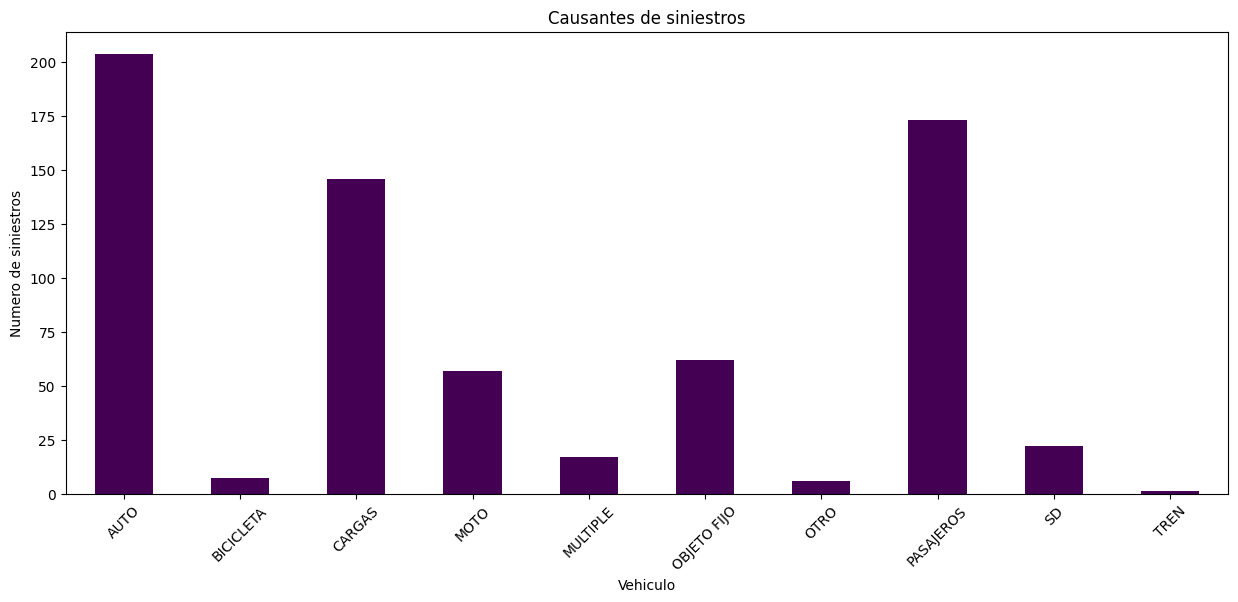

In [45]:
#graficamos los accidentes que causan cada tipo de vehiculo en la columna["ACUSADO"] 
vehiculo_por_mes = clean_hechos.groupby(['ACUSADO']).size() #se crea un dataframe con la cantidad de accidentes por año y vehiculo
vehiculo_por_mes.plot(kind='bar', figsize=(15, 6), title="Causantes de siniestros", colormap= "viridis")
plt.xticks(rotation=45) # Rotamos las etiqeutas para mejor vizualisación
plt.xlabel("Vehiculo") # Nombramos el eje x
plt.ylabel("Numero de siniestros")# Nombramos el eje y
plt.show() # Mostramos el graficá

En esta grafica, podemos observar que los acusados de provocar un accidente son en gran media los carros, seguidos notablemente por los pasajeros, y los vehiculos de carga tienen tambien un gran cantidad de siniestros provocados por estos mismos. Analizando primeramente la barra "Auto", "Cargas","pasajeros" podemos darnos cuenta que son los principales causantes de siniestros, esto se puede deber a muchos factores, analizando las columnas nos damos cuenta de: 




Los conductores de los autos conducen a exceso de velocidad, los conductores de los autos estan bajo efectos de drogas o de alcohol, su unidad u vehiculo no tiene un buen mantenimiento,quieren rebasar u pasarse a otro carril sin prender los intermitentes, o no respetan la señalizaciones.
En cuestiones de los vehiculos de cargas, podemos darnos una idea de que los siniestros viales producidos por estos accidentes suelen ser, porque los conductores de estas unidades se quedan dormidos, no tienen la capacitación para poder manejar este tipo de vehiculos, las unidades andan en exceso de velocidad, sus unidades de vehiculos no tienen el mantenimiento adecuado, en otras cuestiones al intentar dar vuelta o su poca visibilidad para maniobrar producen las condiciones para provocar siniestros.
Los pasajeros, aunque es sorprendente, son causantes de una alta cantidad de siniestros, las razones pueden ser desde una discución con el conductor, la distracción de ellos al conductor, riñas verbales contra otros conductores, la interferencia en la conducción de los vehiculos o comportamiento inadecuado dentro del vehiculo. 

Las acciones que se pueden tomar para disminuir los siniestros viales en este tipo de vehiculos , que son los que mas accidentes causan son:
en autos, desplegar mas operativos viales, revisar las licencias de conducir, poner sistemas/operativos del alcoholimetro.
En dado caso de los vehiculos de carga , revisar las licencias de conducir si estan vencidas o si es el caso ver que realmente este capacitado para el manejo del vehiculo. Hacer operativos en areas de fabrica o industria donde mas concentración de este tipo de vehiculos ahí.
En cuestión de los pasajeros, hacer concientisación por medio de campañas de publicidad en television o en redes sociales, el buen comportamiento del copiloto y pasajeros.

Comuna con mas siniestros


In [46]:
# Agrupar los datos por la columna 'comuna' y sumar el total de víctimas por cada comuna
victimas_por_comuna = df.groupby("COMUNA")["N_VICTIMAS"].sum().sort_values(ascending=False)
victimas_por_comuna = victimas_por_comuna.drop(0)

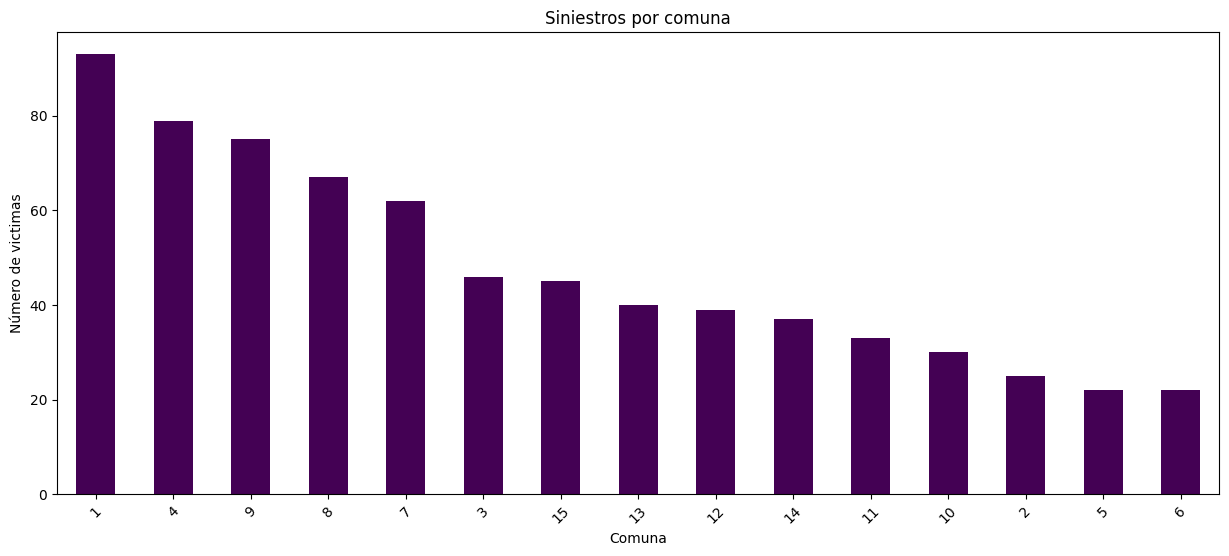

In [47]:
#Graficamos la cantidad de victimas por comuna
victimas_por_comuna.plot(kind='bar', figsize=(15, 6), title='Siniestros por comuna', colormap= "viridis") 
plt.xticks(rotation=45) # Rotamos las etiquetas
plt.xlabel('Comuna') # Definimos el nombre del eje x
plt.ylabel('Número de victimas') #Definimos el nombre del eje Y
plt.show() # Mostramos la Grafica

En esta grafica podemos observar como las comunas inferiores a 10, son donde se concentran la mayor cantidad de siniestros, siendo la comuna 1 , el lugar donde mas siniestros han ocurrido, seguido de las comunas 4,9,8,7 las que le siguen, siendo la comuna 5,6 la que menor casos de siniestros tienen registrados, las explicaciones del porque se concentran los accidentes en estas comunas son:

Las comunas mencionadas, tienden a concentrarse la mayor parte de sitios de ocio,entrenimiento y vida nocturna, puede causar una gran afluencia en la vialidad siendo mas concurridas, transitadas, tambien es posible que la mayor cantidad de avenidas o autopistas, se encuentren en estas comunas.

La recomendación que puedo dar es, prestar mas atención a las primeras 5 comunas de esta grafica , desplegar mas operativos viales de alcoholimetro, revision de licencias de conducir , a su vez verificar si hay señalamientos y en dado que si halla, verificar si los señalaminetos son los correctos, si estan visibles.

Tipo de viabilidad con mas siniestros

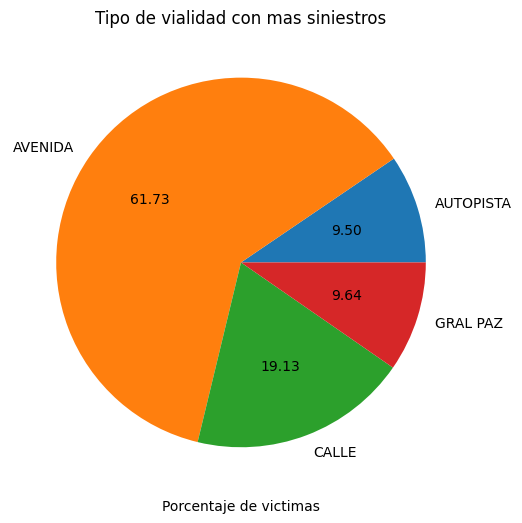

In [48]:
#sumamos el tipo de calle y lo graficamos en una grafica de pastel
calle_por_comuna = clean_hechos.groupby("TIPO_DE_CALLE")["N_VICTIMAS"].sum()
calle_por_comuna.plot(kind='pie', figsize=(15, 6), title='Tipo de vialidad con mas siniestros', autopct='%.2f') # Declaramos la grafica y el tipo de grafica
plt.xlabel("Porcentaje de victimas") # Titulo del eje x 
plt.ylabel("") #Declaramos este eje en "" para que no aparesca N_victimas
plt.show() # Mostramos la grafica

En esta grafica podemos observar el porcentaje que ocupa cada tipo de vialidad en el total de los siniestros. Siendo las avenidas con el mayor porcentaje de siniestros viales registrados, seguido por las calles que mantiene tambien buena parte de los siniestros registrados.
Un descubrimiento al analizar estos datos, es que las autopistas y la provincia de Gral Paz , tienen casi el mismo porcentaje de siniestros registrados.

La explicación que podemos darle a esta grafica, es que las avenidas al ser vialidades largas y muy transitadas,son el escenario para que halla todo tipo de escenarios causantes de siniestros, desde dicusiones con otros pasajeros, tratar de rebasar , exceso de velocidad en las avenidas, no ceder el paso, irresponsabilidad de peatones al querer cruzar, por las noches al tener las avenidas libres, exceso de velocidad , no respetar los semaforos, o estar en estado de embriaguez o bajo efectos de sustancias.
En las calles , el porcentaje de siniestros registrados puede deberse a la falta de señalamientos, falta de educación vial, falta de reducciones de velocidad, descuido de peatones al cruzar las calles, inprudencias del conductor, ausencia de semaforos.
En las autopistas podemos decir que el exceso de velocidad es el principal factor que producen los accidentes, asu vez la falta de experiencia en estos tipos de vialidades producen los accidentes, la falta de mantenimiento o la precencia de sueño pueden ser tambien factores que desencadenen esto.
Gral paz, tiene el mismo registro de accidentes que las autopistas, esto puede deverse a la mala planificación de las calles y la falta de señalamientos, la falta de semaforos, incluso el estado de las calles y avenidas

Hora donde se registran mas siniestros viales


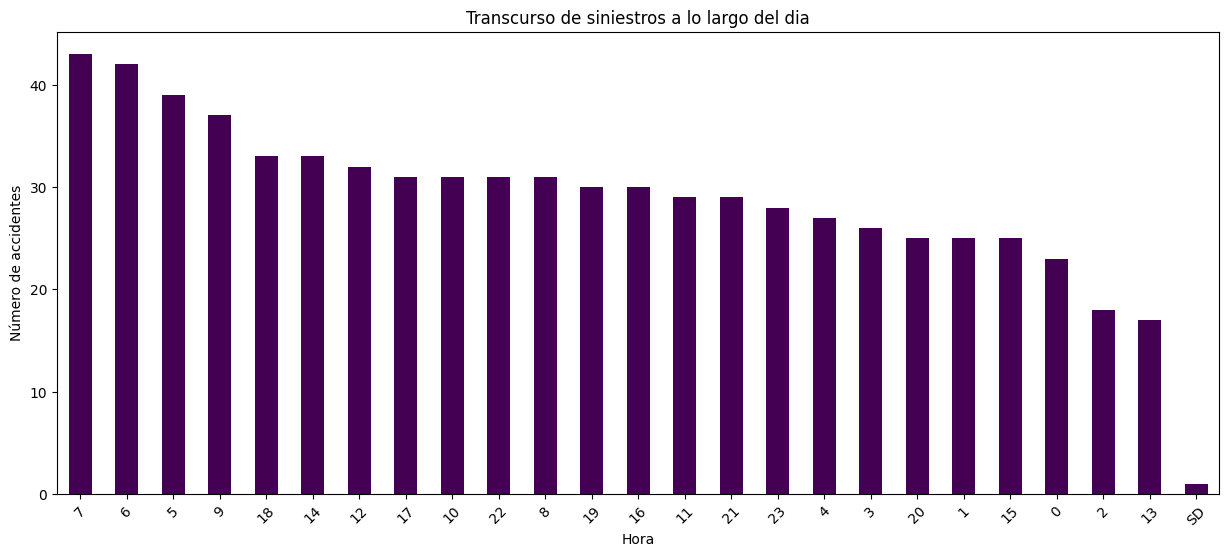

In [49]:
#Cual es la hora en la que mas accidentes hay
hora_por_accidente = clean_hechos.groupby("HH")["N_VICTIMAS"].sum().sort_values(ascending=False)
hora_por_accidente.plot(kind='bar', figsize=(15, 6), title='Transcurso de siniestros a lo largo del dia', colormap= "viridis")
plt.xticks(rotation=45)
plt.xlabel('Hora')
plt.ylabel('Número de accidentes')
plt.show()

En esta grafica, podemos observar cuales son las horas del dia, en el que ocurren los siniestros viales, como ven las horas donde mas disminuyen los siniestros viales son a la 1 de la tarde donde la gente sale a su descanso o cambio de turno y en la hora de salida de las 6, mientras que el pico mas alto es durante el transcurso de la madrugada.

La consecuencia o el motivo de que ocurran los accidentes y que no ocurran los accidentes en estas horas son: 
El transcurso de la 1 de la tarde la mayoria de la gente sale a su hora de comida , salen a comprar o hacer tramite, los estudiantes salen o entran a las escuelas, al ver tanta afluencia de vehiculos es limitada la acción o la capacidad de maniobra que permita generar accidentes, en cambio a las 7,6 y 5 de la mañana al ser horas donde la gente aun no se ha despertado o donde los del turno de la noche van de regreso a su casa, los drivers tambien, producen accidentes por tener sueño, porque al no ver tanta movilidad vehicular exceden el limite de velocidad, o en otra posibilidad regresan a sus casas despues de eventos/fiestas en un estado de embriaguez oi bajo el efecto de sustancias. Agregando a este analisis queda agregar que tambien los vehiculos de cargas a ser su hora permitida de transitar influyen a que sean causantes de estos accidentes.

Al tener 4 hras en clave que tener en cuenta, puedo recomendar tomar acciones de la siguiente forma, en primera hacer recordatorio a los vehiculos por medio de estaciones de radio o anuncios en alguna cadena de musica, en hacer conciencia que esos trabajos deben de estar totalmente despieros, en segunda, hacer una vigilancia mas estrica en esas horas, haciendo retenes , alcoholimetros y desplegar rondines por las vias mas transitadas en esas horas de la madrugada.


Explicamos el tipo de vehiculo que produce accidentes en la hora mas alta del dia

In [50]:
#creamos un dataframe solamente con el valor 7 en la columna ["HH"]
hora_7 = clean_hechos[clean_hechos["HH"] == "7"  ]
#agrupamos por tipo de acusado de la columna ["ACUSADO"]
accidentes_por_acusado = hora_7.groupby('ACUSADO').size()

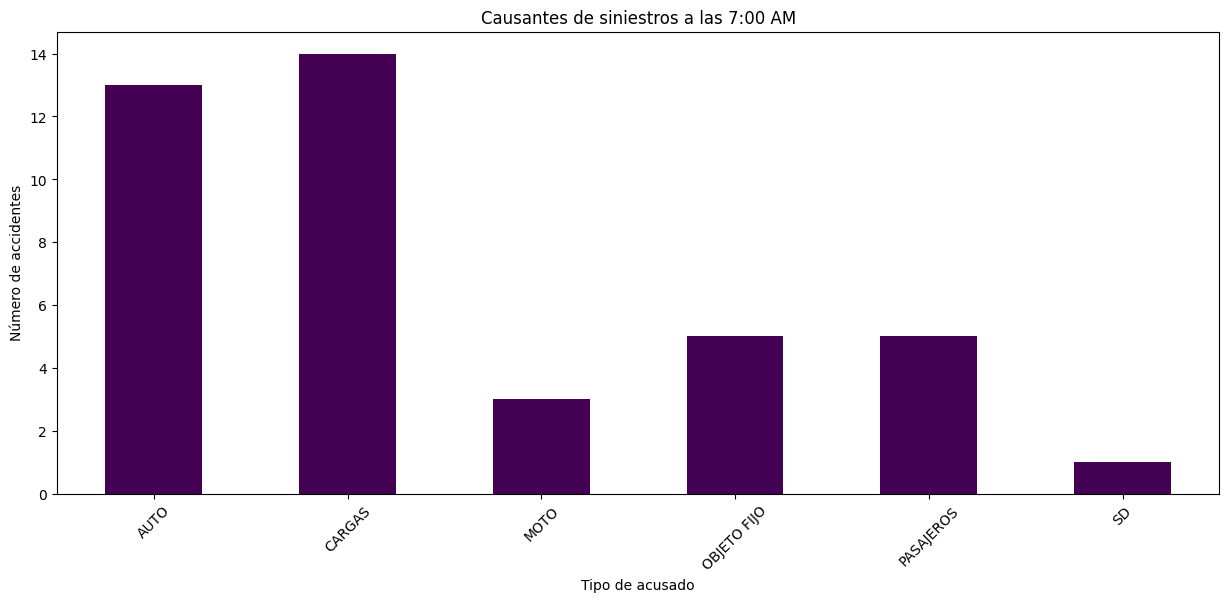

In [51]:
#Graficamos el dataframe accidentes_por_acusado
accidentes_por_acusado.plot(kind='bar', figsize=(15, 6), title="Causantes de siniestros a las 7:00 AM", colormap= "viridis")
plt.xticks(rotation=45) # Rotamos los valores
plt.xlabel('Tipo de acusado') # Nombre del tipo de acusado
plt.ylabel('Número de accidentes') # Cantidad de accidentes
plt.show() # Mostramos la grafica

En esta grafica, representamos que los causantes de los siniestros a las 7:00 AM son los autos y los vehiculos de cargas, mientras que los demas causantes son notablemente menos.

La explicacion a este fenomeno tiene mas que ver , principalmente con la falta de sueño a estas horas y tambien se pueden relacionar con el exceso de velocidad, me explico mejor. Los siniestros por cargas es muy comunmente que los conductores a esa horas tengan sueño, y al tener un vehiculo muy grande ,cualquier descuido puede ser fatal, dado el peso y la velocidad que manejan. En caso de los autos, los motivos para que se generen los siniestros es que los carros a esa hora al tener las calles libres, conducen mas velocidad, en otra supocicion los conductores se quedan dormidos.

Cruces con mas accidentes

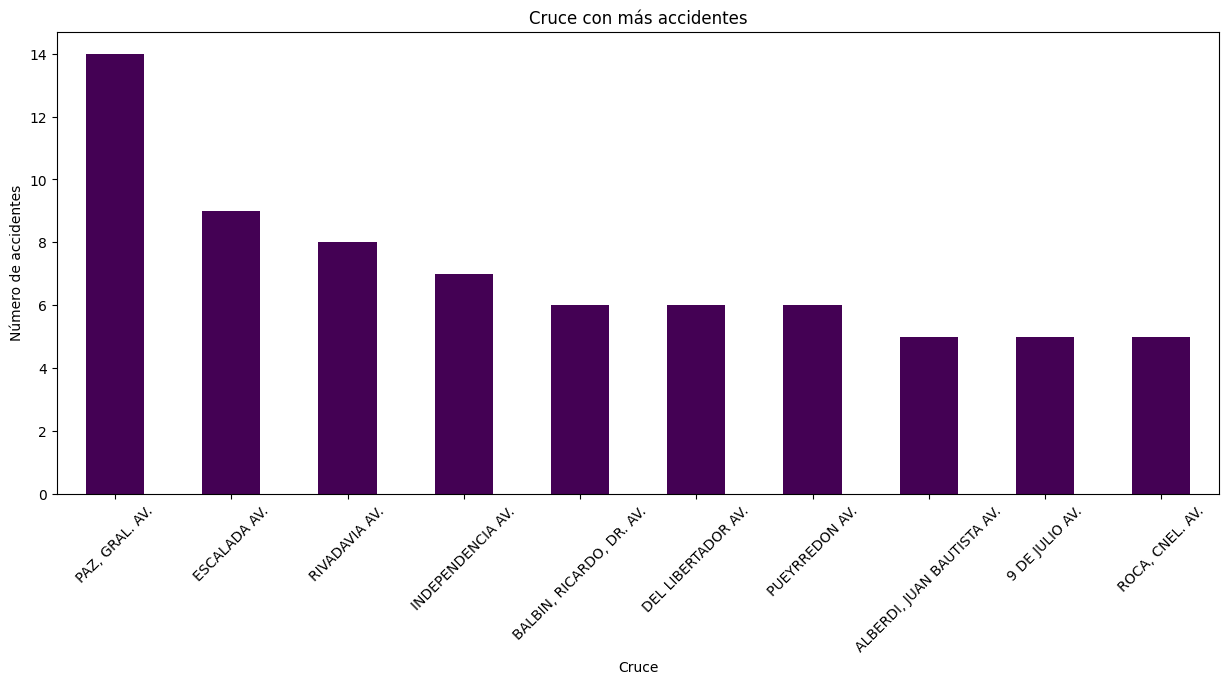

In [52]:
#Buscamos el cruce con mas menciones
cruce_con_mas_menciones = clean_hechos["Cruce"].value_counts().head(10)
cruce_con_mas_menciones.plot(kind='bar', figsize=(15, 6), title='Cruce con más accidentes', colormap= "viridis")
plt.xticks(rotation=45)
plt.xlabel('Cruce')
plt.ylabel('Número de accidentes')
plt.show()

En esta grafica, observamos que el cruce con mas siniestros viales esta dentro de la avenida Gral paz, seguida de la avenida de la esclada y rivadavia.

La avenida general paz esta ubicada dentro del sitio o lugar donde mas accidententes se han registrado segun la grafica anteriores, esto puede darse a que no hay reductores de velocidad, no hay señalamientos visibles o no hay o el semaforo no esta en operacion. Al igual de las otras avenidas la falta de educacion vial o la falta de semaforos y ausencia de reductores de velocidad son causantes de siniestros, mala visibilidad del cruce.

Las acciones que puedo recomendar, es concentrarnos en el cruce de la avenida en Gral paz, poner reductores de velocidad y señalamientos, y a las demas avenidas arreglar , disponer de semaforos. Poniendo de alguna manera o por momentos agentes de viabilidad que vayan coordinando el transíto.

Calles con mas siniestros

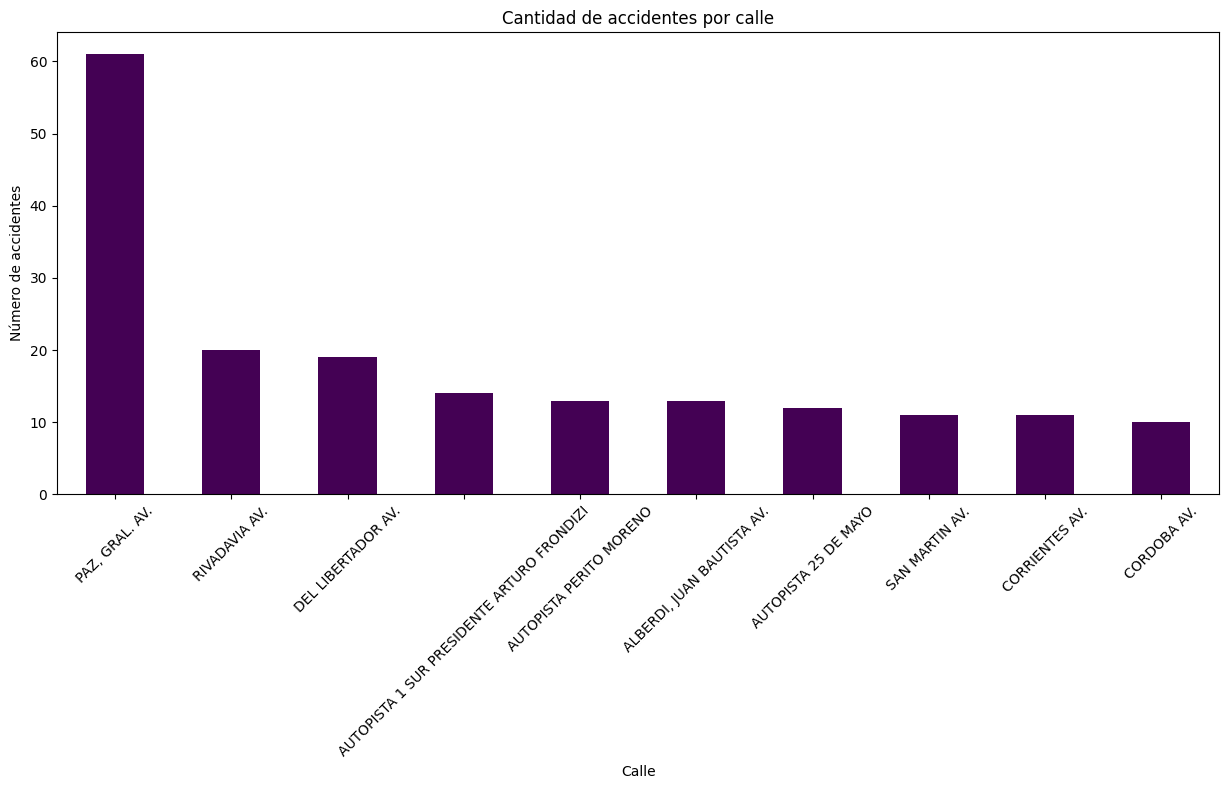

In [53]:
#agrupamos y clasificamos con la columna ["Calle"] 
calle_por_mes = clean_hechos.groupby("Calle")["N_VICTIMAS"].sum().sort_values(ascending=False)
calle_por_mes.head(10).plot(kind='bar', figsize=(15, 6), title='Cantidad de accidentes por calle', colormap= "viridis")
plt.xticks(rotation=45)
plt.xlabel('Calle')
plt.ylabel('Número de accidentes')
plt.show()

En esta grafica, podemos ver que la calle con mas accidentes es la avenida general paz, seguida de la avenida de la esclada y rivadavia. Cabe decir que despues de tantos analísis nos tiene en claro que la zona de Gral paz, es una zona en la cual se le tiene que prestar atención dado la cantidad de siniestros que ocurren en este lugar.

Puedo explicar que este lugar de Gral Paz , ocasiona muchos siniestros dado el mal estado de la calle, la mala distribución de estos, mal diseño de esta calle o por exceso de velocidad , inprudencia peatonal tambien es posible.

Recomiendo que se haga una evaluación del estado de la calle, si hay señalamientos o no, tambien puede influir que tanta visibilidad tiene el conductor en esa calle, puede que halla carros estacionados que disminuyan la visibilidad, si hay comercios de la calle , despejarlos de la calle. 

Cantidad de victimas por Causantes

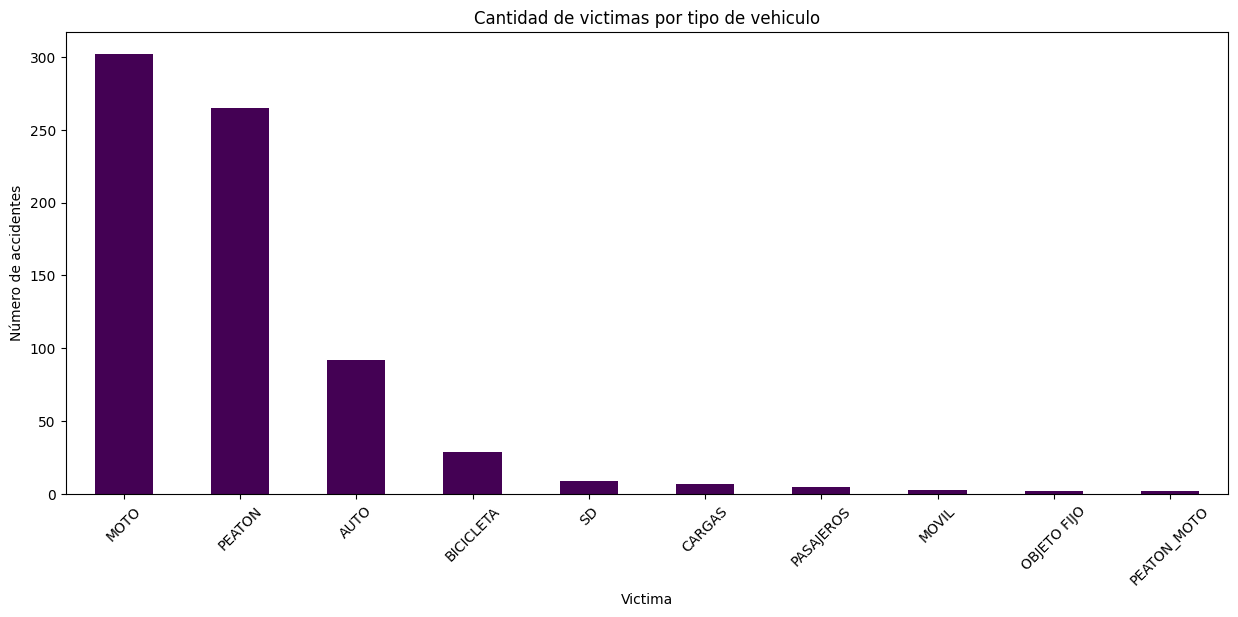

In [54]:
#Graficamos la columna ["VICTIMA"]
victima_por_mes = clean_hechos.groupby("VICTIMA")["N_VICTIMAS"].sum().sort_values(ascending=False)
victima_por_mes.head(10).plot(kind='bar', figsize=(15, 6), title='Cantidad de victimas por tipo de vehiculo', colormap= "viridis")
plt.xticks(rotation=45)
plt.xlabel('Victima')
plt.ylabel('Número de accidentes')
plt.show()

Las motos y los peatones como vemos aqui, son los principales victimas de los siniestros viales, siendo de estas dos, las motos quienes mas reciben las consecuencias de los siniestros. Puedo decir, que no siempre la victima es la que recibe las consecuencias de los siniestros, si no es ella misma que provoca los siniestros. Como analogia, los padres que descuidan a los niños en las calles, los conductores revisando el movil mientras conducen o el peaton no fijandose por ambos lados de la calle para poder pasar.